# Daymet Single Pixel Tool Analysis
This data is derived from the request log entries of the Daymet Single Pixel Tool hosted by the ORNL DAAC
between 2020-01-01 and 2021-08-15.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
df1 = pd.read_csv("./data/spet_processing_time.csv", index_col='date', parse_dates=True)

[Text(0, 0, '01 - 2020'),
 Text(1, 0, '02 - 2020'),
 Text(2, 0, '03 - 2020'),
 Text(3, 0, '04 - 2020'),
 Text(4, 0, '05 - 2020'),
 Text(5, 0, '06 - 2020'),
 Text(6, 0, '07 - 2020'),
 Text(7, 0, '08 - 2020'),
 Text(8, 0, '09 - 2020'),
 Text(9, 0, '10 - 2020'),
 Text(10, 0, '11 - 2020'),
 Text(11, 0, '12 - 2020'),
 Text(12, 0, '01 - 2021'),
 Text(13, 0, '02 - 2021'),
 Text(14, 0, '03 - 2021'),
 Text(15, 0, '04 - 2021'),
 Text(16, 0, '05 - 2021'),
 Text(17, 0, '06 - 2021'),
 Text(18, 0, '07 - 2021'),
 Text(19, 0, '08 - 2021')]

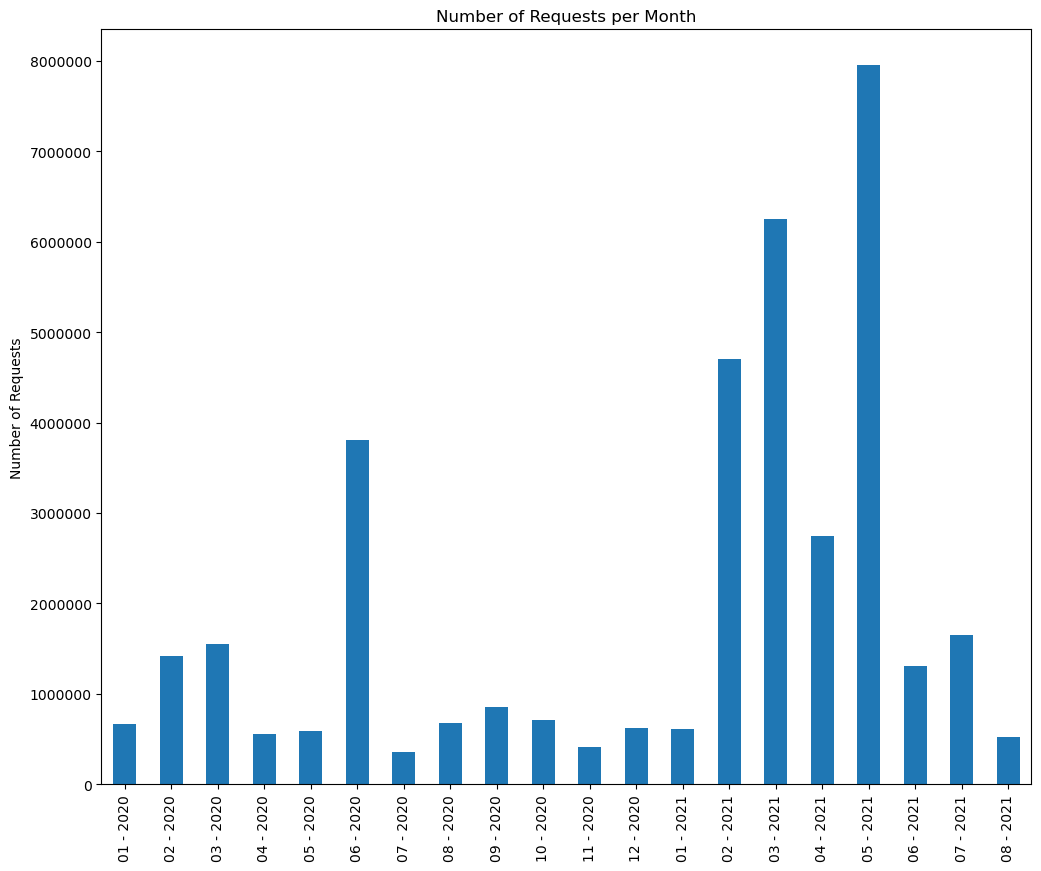

In [3]:
from matplotlib.ticker import FormatStrFormatter
title = "Number of Requests per Month"
ylabel = "Number of Requests"
xlabel = "Month"
num_req_plot = df1['Num_Requests'].resample('M').sum().plot.bar(figsize=(12,10), title=title)
num_req_plot.set(xlabel="", ylabel=ylabel)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d"))
num_req_plot.set_xticklabels([f"{date.month:02} - {date.year}" for date in df1.resample('M').mean().index.tolist()])

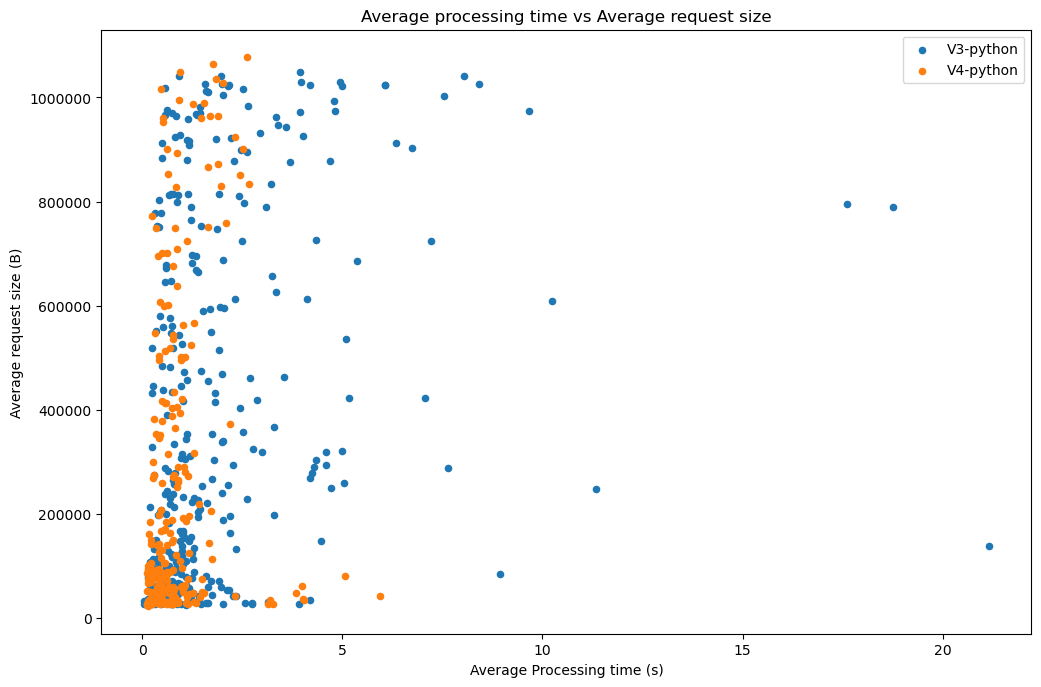

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
title = "Average processing time vs Average request size"
xlabel = "Average Processing time (s)"
ylabel = "Average request size (B)"
fig,ax = plt.subplots()
colors = {"V3-python":"tab:blue", "V4-python":"tab:orange"}
for version,group in df1.groupby('daymetVersion'):
   group.plot(ax=ax, x='Mean_Time', y='Mean_Size', kind='scatter', label=version, color=colors[version])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d"))
plt.legend()
plt.show()

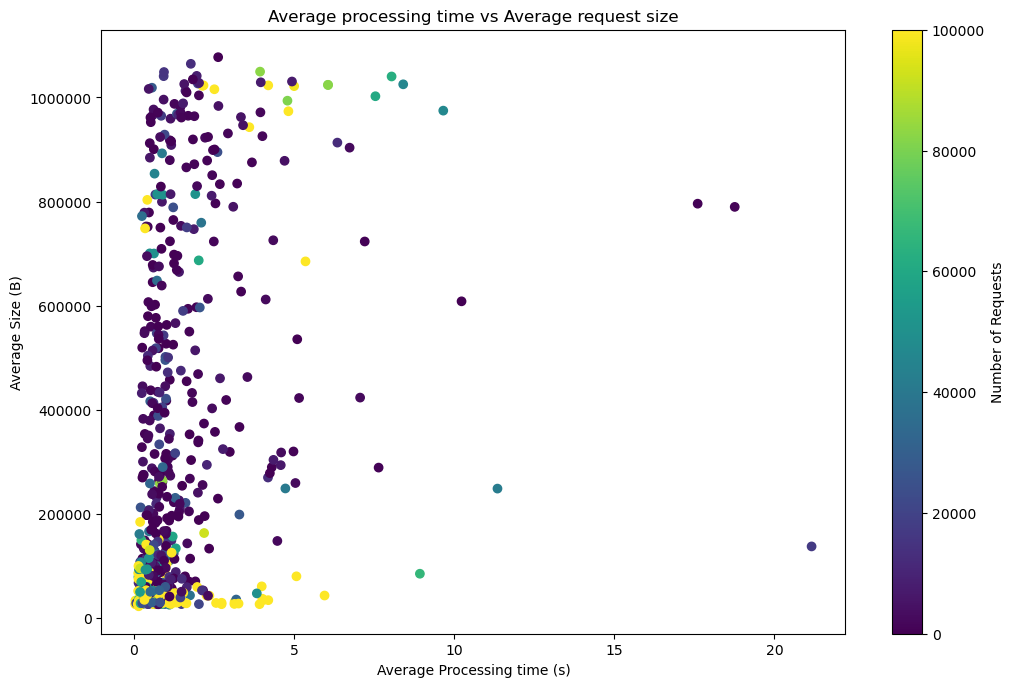

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
title = "Average processing time vs Average request size"
xlabel = "Average Processing time (s)"
ylabel = "Average Size (B)"
plt.scatter(x=df1['Mean_Time'], y=df1['Mean_Size'], c=df1['Num_Requests'],cmap='viridis', vmin=0, vmax=100000)
cb=plt.colorbar(format=FormatStrFormatter("%d"))
cb.set_label('Number of Requests')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d"))
plt.show()

(0.0, 1130239.865785)

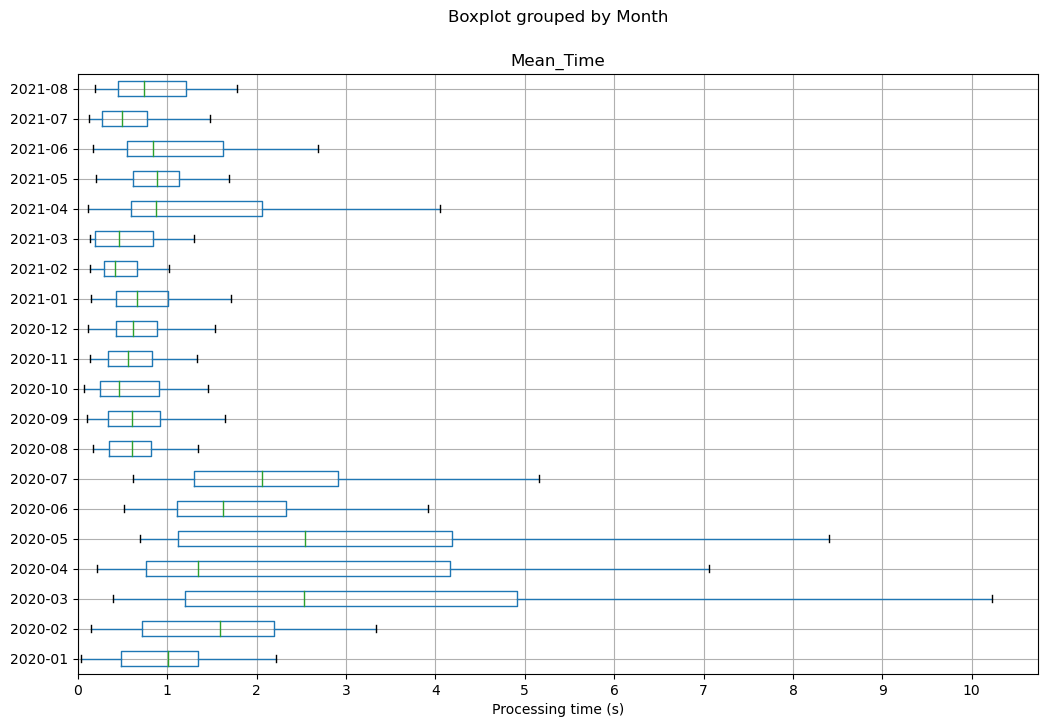

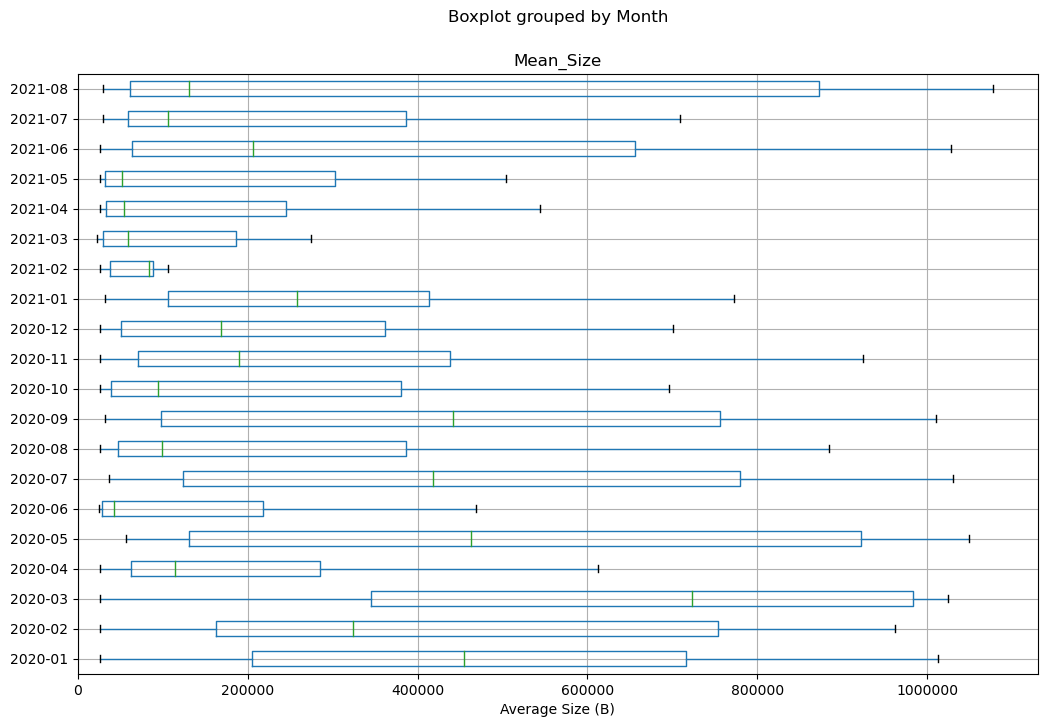

In [6]:
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,AutoMinorLocator
df1['Month'] = df1.index.to_period('M')
time_title = "Monthly average process time"
time_x_label = "Processing time (s)"
avg_time_box = df1.boxplot(column=['Mean_Time'], by='Month', vert=False, showfliers=False)
avg_time_box.set(xlabel=time_x_label)
avg_time_box.xaxis.set_major_locator(MultipleLocator(1))
avg_time_box.set_xlim(left=0)

size_x_label = "Average Size (B)"
avg_size_box = df1.boxplot(column=['Mean_Size'], by='Month', vert=False, showfliers=False)
avg_size_box.set(xlabel=size_x_label)
avg_size_box.xaxis.set_major_formatter(FormatStrFormatter("%d"))
avg_size_box.set_xlim(left=0)